In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY= r"C:\Users\s\Research\Schizophrenia\SchiData"
CATAGORIES= ['normal','schizophrenia']

In [3]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(256,256))
        
        data.append([img_arr,label])

In [4]:
data

[[array([[[ 41,  32,  29],
          [ 39,  32,  29],
          [ 34,  32,  32],
          ...,
          [ 39,  31,  31],
          [ 34,  32,  32],
          [ 32,  32,  32]],
  
         [[ 43,  37,  32],
          [ 44,  40,  35],
          [ 42,  39,  34],
          ...,
          [ 43,  39,  34],
          [ 37,  36,  32],
          [ 36,  40,  35]],
  
         [[176, 177, 168],
          [169, 169, 157],
          [ 84,  82,  64],
          ...,
          [207, 207, 191],
          [ 38,  42,  30],
          [164, 172, 161]],
  
         ...,
  
         [[117, 110, 101],
          [197, 193, 188],
          [195, 197, 197],
          ...,
          [207, 203, 208],
          [194, 198, 203],
          [152, 160, 167]],
  
         [[ 36,  33,  29],
          [ 50,  49,  45],
          [ 45,  45,  45],
          ...,
          [110, 109, 111],
          [117, 119, 120],
          [ 97, 101, 102]],
  
         [[ 32,  33,  31],
          [ 41,  42,  40],
          [ 41,  41,  41

In [5]:
random.shuffle(data)


In [6]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
X = np.array(x)
Y = np.array(y)

In [8]:
x

[array([[[ 48,  38,  38],
         [ 46,  38,  38],
         [ 41,  39,  39],
         ...,
         [ 39,  39,  39],
         [ 41,  39,  39],
         [ 41,  39,  39]],
 
        [[ 51,  44,  41],
         [ 72,  68,  63],
         [ 63,  60,  55],
         ...,
         [ 75,  71,  70],
         [ 67,  66,  68],
         [ 63,  65,  66]],
 
        [[181, 179, 169],
         [182, 180, 169],
         [ 97,  94,  79],
         ...,
         [ 77,  68,  65],
         [ 67,  68,  72],
         [ 56,  62,  69]],
 
        ...,
 
        [[122, 114, 107],
         [201, 197, 192],
         [196, 199, 197],
         ...,
         [198, 186, 186],
         [ 73,  76,  90],
         [ 55,  67,  85]],
 
        [[ 43,  39,  38],
         [ 65,  63,  62],
         [ 54,  54,  54],
         ...,
         [ 59,  54,  55],
         [ 64,  65,  69],
         [ 53,  57,  62]],
 
        [[ 39,  39,  39],
         [ 57,  57,  57],
         [ 59,  59,  59],
         ...,
         [ 61,  61,  61],
  

In [9]:
X=X/255

In [10]:
X

array([[[[0.18823529, 0.14901961, 0.14901961],
         [0.18039216, 0.14901961, 0.14901961],
         [0.16078431, 0.15294118, 0.15294118],
         ...,
         [0.15294118, 0.15294118, 0.15294118],
         [0.16078431, 0.15294118, 0.15294118],
         [0.16078431, 0.15294118, 0.15294118]],

        [[0.2       , 0.17254902, 0.16078431],
         [0.28235294, 0.26666667, 0.24705882],
         [0.24705882, 0.23529412, 0.21568627],
         ...,
         [0.29411765, 0.27843137, 0.2745098 ],
         [0.2627451 , 0.25882353, 0.26666667],
         [0.24705882, 0.25490196, 0.25882353]],

        [[0.70980392, 0.70196078, 0.6627451 ],
         [0.71372549, 0.70588235, 0.6627451 ],
         [0.38039216, 0.36862745, 0.30980392],
         ...,
         [0.30196078, 0.26666667, 0.25490196],
         [0.2627451 , 0.26666667, 0.28235294],
         [0.21960784, 0.24313725, 0.27058824]],

        ...,

        [[0.47843137, 0.44705882, 0.41960784],
         [0.78823529, 0.77254902, 0.75294118]

In [11]:
X.shape

(464, 256, 256, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [13]:
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
14/14 [==============================] - 43s 3s/step - loss: 0.2994 - accuracy: 0.8513 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2/15
14/14 [==============================] - 38s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.8612e-05 - val_accuracy: 1.0000
Epoch 3/15
14/14 [==============================] - 37s 3s/step - loss: 8.9321e-06 - accuracy: 1.0000 - val_loss: 1.4711e-07 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 37s 3s/step - loss: 4.6024e-07 - accuracy: 1.0000 - val_loss: 1.0906e-07 - val_accuracy: 1.0000
Epoch 5/15
14/14 [==============================] - 34s 2s/step - loss: 4.9168e-07 - accuracy: 1.0000 - val_loss: 9.8918e-08 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 35s 2s/step - loss: 4.5709e-07 - accuracy: 1.0000 - val_loss: 8.1164e-08 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 35s 2s/step - loss: 3.7791e-07 - accuracy: 1.0000 - val_loss: 6.3409e-08

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [20]:
from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"C:\Users\s\Research\Schizophrenia\SchiData\normal\normal_series_-img-00003-00016.jpg",target_size=(256,256))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="normal"
    
    
else:
    prediction="schizophrenia"
print(prediction)

[[1. 0.]]
normal


TypeError: Invalid shape () for image data

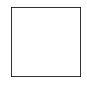

In [18]:
columns=8
rows=8

for ftr in rslt:
    fig=plt.figure(figsize=(12,12))
    for i in range(1,columns*rows+1):
        fig=plt.subplot(rows,columns,i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0])
        plt.show